# Решение нелинейных уравнений
Варинат 19 (задачи 2.1.19, 2.2.4, 2.10.2)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve

In [0]:
def f(x):
    return np.log(x) + np.cos(np.pi * x / 2) * np.exp(-pow(x, 2))
def f_d(x):
    return 1/x - 2 * np.exp(-x**2) * x * np.cos((np.pi * x) / 2) - 1/2 * np.exp(-x**2) * np.pi * np.sin((np.pi * x) / 2)   

## Метод бисекции

In [0]:
def bisect(f, a, b, N_max = 1000, eps = 1e-12, show_iter=False):
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b
    N_iter = 0
    x_prev = a
    while N_iter < N_max:
        x = (a + b) / 2
        if abs(x - x_prev) < eps:
            break
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        x_prev = x
        N_iter += 1
    if show_iter:
        print('Количество итераций:', N_iter)
    return x

In [0]:
bisect(f, 0.5, 3)

1.000000000001819

## Метод Ньютона

In [0]:
def newton(f, f_der, x0, N_max = 1000, eps = 1e-12, show_iter=False):
    N_iter = 0
    x_prev = x0
    while N_iter < N_max:
        x0 = x0 - f(x0) / f_der(x0)
        if abs(x0 - x_prev) < eps:
            break
        x_prev = x0
        N_iter += 1    
    if show_iter:
        print('Количество итераций:', N_iter)
    return x0

In [0]:
newton(f, f_d, 2.51)

1.000000000000009

## Метод секущих

In [0]:
def secant(f, x0, x1, N_max = 1000, eps = 1e-8):
    N_iter = 0
    f_x0 = f(x0)
    f_x1 = f(x1)
    while N_iter < N_max:
        f_der = (f_x0 - f_x1) / (x0 - x1)
        x2 = x1 - f_x1 / f_der
        f_x2 = f(x2)
        if abs(x2 - x1) < eps:
            break
        N_iter += 1
        f_x0, f_x1 = f_x1, f_x2
        x0, x1 = x1, x2
    return x2

In [42]:
secant(f, 1.1, 1.5)

1.0000000000000737

## Локализация корней

In [0]:
def localize(f, a, b, f_name = 'f'):
    x = np.linspace(a, b, num=100)
    y = [f(x_) for x_ in x]

    plt.figure(figsize=(13, 6))
    plt.plot(x, y)
    plt.title(f'Функция ${f_name}(x)$')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel(f'${f_name}(x)$')
    plt.show()

**Задача 2.1.** Даны два уравнения $f(x)=0$ и $g(x)=0$. Найти с точностью $ε = 10^{-10}$ все корни уравнений, содержащиеся на отрезке $[a, b]$.

$f(x) = cos(x)^2 - \cfrac{2}{35} cos(x) - \cfrac{1}{35}$

$g(x) = cos(x)^2 - \cfrac{2}{5} cos(x) + \cfrac{1}{25}$

$[a, b] = [0, 3]$

**Аналитическое решение** $f(x) = 0$: 

$f(x) = (cos(x) - \cfrac{1}{5})(cos(x) + \cfrac{1}{7})$

$x_1 = arccos(\cfrac{1}{5}) = 1.3694, x_2 = \pi - arccos(\cfrac{1}{7})= 1.7141$

**Аналитическое решение** $g(x) = 0$: 

$g(x) = (cos(x) - \cfrac{1}{5})^2$

$x = 1.3694$

In [0]:
def f(x):
    return np.cos(x) ** 2 - 2 * np.cos(x) / 35 - 1 / 35

def g(x):
    return np.cos(x) ** 2 - 2 * np.cos(x) / 5 + 1 / 25

a, b = 0, 3

**Локализуем корни**

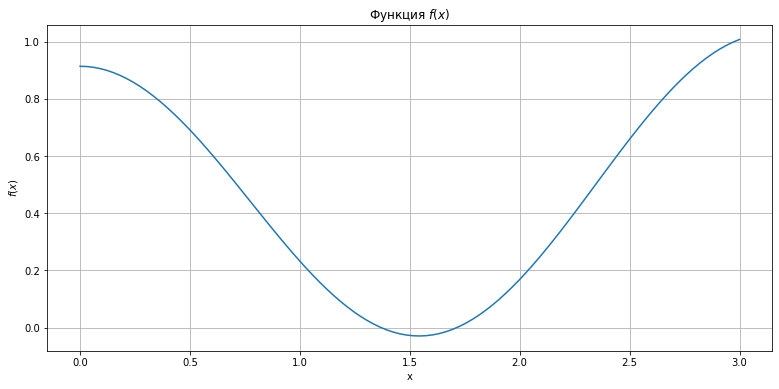

In [19]:
localize(f, a, b)

*Корни расположены около 1.4 и 1.7.*
*Отрезки локализации равны, сооответственно,* $[1, 1.5]$ и $[1.5, 2]$

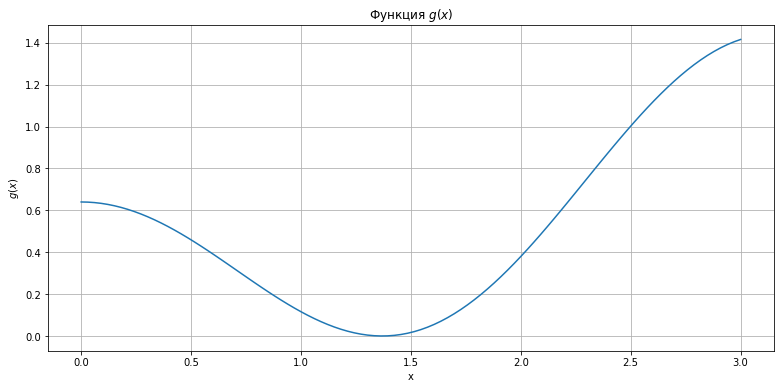

In [20]:
localize(g, a, b, 'g')

*Корень находится около 1.4, функция все время неотрицательна. Нельзя подобрать отрезок* $[a, b]$: $g(a) g(b) < 0$

**Встроенное решение**

In [67]:
print(fsolve(f, 1, xtol=1e-10))
print(fsolve(f, 2, xtol=1e-10))
print(fsolve(g, 1, xtol=1e-10))

[1.36943841]
[1.7141439]
[1.3694384]


**Решение методом бисекции**

In [12]:
bisect(f, 1, 1.5, eps=1e-10)

1.3694384060218

In [13]:
bisect(f, 1.5, 2, eps=1e-10)

1.7141438957187347

In [14]:
bisect(g, 1, 2, eps=1e-10)

1.9999999999417923

*Корни функции* $f(x)$ *удалось локализовать.*

*Из-за того, что у функции* $g(x)$ *не существует отрезка локализации, алгоритм стремится к правому концу отрезка.*

**Задача 2.2**. Найти указанный в варианте корень уравнения $f(x)=0$ с $ε = 10^{-6}$ двумя способами.

а) Использовать метод бисекции. Предварительно определить отрезок локализации $[a, b]$.

b) Использовать метод Ньютона. В качестве начального приближения для метода Ньютона взять середину отрезка локализации из п. а).

Сравнить число итераций в п. a), b)

$f(x) = (x+1) e^{x+1} -x -2$, найти наибольший по модулю корень

In [0]:
def f(x):
    return (x + 1) * np.exp(x + 1) - x - 2

def f_der(x):
    return (x + 1) * np.exp(x + 1) + np.exp(x + 1) - 1

**Локализуем корни**

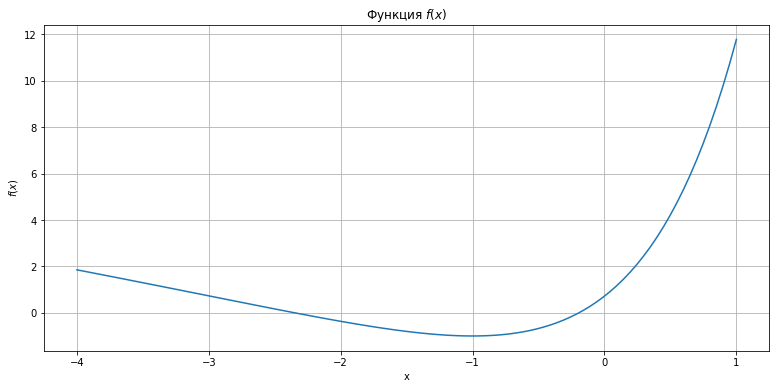

In [26]:
localize(f, -4, 1)

*Отрезки локализации:* $[-4, -1]$, $[-1, 1]$

**Решение методом бисекции**

In [30]:
bisect(f, -4, -1, eps=1e-6, show_iter=True)

Количество итераций: 21


-2.349975824356079

In [31]:
bisect(f, -1, 1, eps=1e-6, show_iter=True)

Количество итераций: 20


-0.19353389739990234

**Решение методом Ньютона**

In [36]:
newton(f, f_der, -2.5, eps=1e-6, show_iter=True)

Количество итераций: 2


-2.3499764854011267

In [37]:
newton(f, f_der, 0, eps=1e-6, show_iter=True)

Количество итераций: 4


-0.19353400576367308

*Метод Ньютона сходтся быстрее (если сравнить количество итераций)*

**Задача 2.10.** Функция $y=f(x)$ задана неявно уравнением $F(x,y)=0$. На отрезке $[1, 5]$ построить таблицу значений функции $y=f(x)$ с шагом $h=0.5$, применяя один из методов численного решения нелинейного уравнения (с точностью $ε = 10^{-7} $). Построить график функции $y=f(x)$ на заданном отрезке.

$F(x, y) = ch(y e^y + \cfrac{x}{20}) + \cfrac{1}{arctg(20ye^y + x)} - 13, 1 \le x \le 5, 1 \le y \le 1.5,$


In [0]:
def secant_2(f, x, y0, y1, N_max = 1000, eps = 1e-8):
    N_iter = 0
    f_y0 = f(x, y0)
    f_y1 = f(x, y1)
    while N_iter < N_max:
        f_der = (f_y0 - f_y1) / (y0 - y1)
        y2 = y1 - f_y1 / f_der
        f_y2 = f(x, y2)
        if abs(y2 - y1) < eps:
            break
        N_iter += 1
        f_y0, f_y1 = f_y1, f_y2
        y0, y1 = y1, y2
    return y2

In [0]:
def bisect_2(f, y, a, b, N_max = 1000, eps = 1e-12, show_iter=False):
    if f(y, a) == 0:
        return a
    elif f(y, b) == 0:
        return b
    N_iter = 0
    x_prev = a
    while N_iter < N_max:
        x = (a + b) / 2
        if abs(x - x_prev) < eps:
            break
        if f(y, a) * f(y, x) < 0:
            b = x
        else:
            a = x
        x_prev = x
        N_iter += 1
    if show_iter:
        print('Количество итераций:', N_iter)
    return x

In [0]:
def f(x, y):
    return np.cosh(y * np.exp(y) + x / 20) + 1 / np.arctan(20 * y * np.exp(y) + x) - 13
a, b = 1, 5
h = 0.5

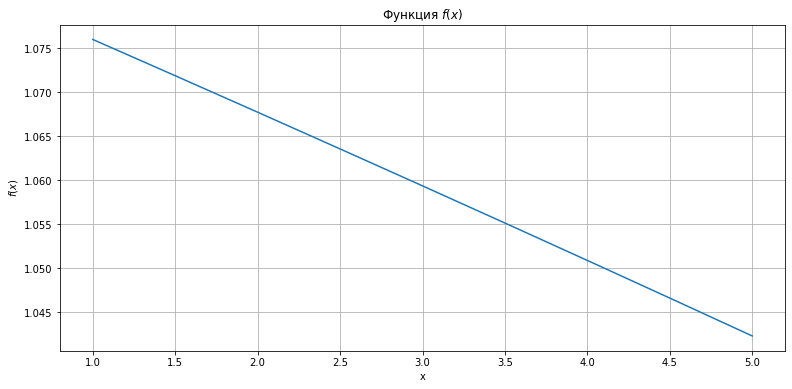

In [57]:
num = (b - a) / h
x = np.linspace(1, 5, num+1)
y = []
for x_ in x:
    y.append(secant_2(f, x_, 1.2, 1.3, eps=1e-7))

plt.figure(figsize=(13, 6))
plt.plot(x, y)
plt.title('Функция $f(x)$')
plt.grid()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.show()

In [58]:
tuple(zip(x, y))

((1.0, 1.0759838513495472),
 (1.5, 1.0718652767376127),
 (2.0, 1.0677213976965467),
 (2.5, 1.0635518845467673),
 (3.0, 1.059356400965877),
 (3.5, 1.0551346038063971),
 (4.0, 1.0508861429071494),
 (4.5, 1.046610660898013),
 (5.0, 1.0423077929977769))

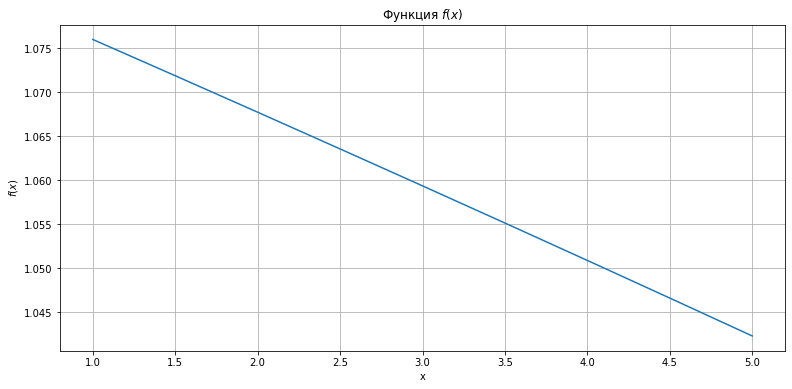

In [62]:
y = []
for x_ in x:
    y.append(bisect_2(f, x_, 1, 1.5, eps=1e-7))

plt.figure(figsize=(13, 6))
plt.plot(x, y)
plt.title('Функция $f(x)$')
plt.grid()
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.show()

In [60]:
tuple(zip(x, y))

((1.0, 1.0759838223457336),
 (1.5, 1.0718652606010437),
 (2.0, 1.067721426486969),
 (2.5, 1.0635518431663513),
 (3.0, 1.0593563914299011),
 (3.5, 1.0551345944404602),
 (4.0, 1.05088609457016),
 (4.5, 1.0466106534004211),
 (5.0, 1.0423077940940857))